In [3]:
pip install ydata-profiling, ipywidgets


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'ydata-profiling,': Expected end or semicolon (after name and no valid version specifier)
    ydata-profiling,
                   ^


In [4]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# I. Tiền xử lý dữ liệu

## 1. Import các thư viện cần thiết

In [5]:
# Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
import pickle

# Evaluation Metrics: Regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
# Evaluation Metrics: Classification
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

In [6]:
from ydata_profiling import ProfileReport

## 2. Đọc dữ liệu

In [7]:
df = pd.read_excel('./Data/Football_Players.xls')
df.shape

(18207, 49)

In [8]:
df.head()

,PlayerID,Name,Age,Nationality,Overall,Club,Value_M,Wage_K,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,FC Barcelona,110.5,565,Left,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,77,405,Right,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,118.5,290,Right,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,Manchester United,72,260,Right,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,102,355,Right,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
df.isnull().sum()

PlayerID                       0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Club                         241
Value_M                        0
Wage_K                         0
Preferred Foot                48
International Reputation      48
Work Rate                     48
Position                      60
Joined                      1553
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Acceleration                  48
SprintSpeed                   48
Agility                       48
Reactions                     48
Balance                       48
ShotPower 

In [10]:
# Xóa missing value
df_cleaned = df.dropna()
df_cleaned.shape 

(16654, 49)

In [11]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().value_counts()

False    18207
Name: count, dtype: int64

In [12]:
# Xóa dữ liệu trùng (nếu có)
df = df.drop_duplicates().copy()

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe()
profile.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

# Giả sử df_cleaned là dataframe đầu vào (không có biến target)

# 1. Split dữ liệu train-test (nếu bạn muốn)
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# 2. Tách cột số và cột categorical
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# --- Xử lý biến số ---
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

# Chuẩn hóa trên train, transform trên test
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Chọn biến số có phương sai > 0.01 (fit trên train, transform trên test)
selector = VarianceThreshold(threshold=0.01)
X_train_num_selected = selector.fit_transform(X_train_num_scaled)
X_test_num_selected = selector.transform(X_test_num_scaled)

# Lấy tên biến số được giữ lại (nếu cần)
selected_num_cols = [num_cols[i] for i, keep in enumerate(selector.get_support()) if keep]

# --- Xử lý biến categorical ---

X_train_cat = X_train[cat_cols].fillna('missing').astype(str)
X_test_cat = X_test[cat_cols].fillna('missing').astype(str)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# --- Kết hợp dữ liệu số và categorical ---
X_train_processed = np.hstack([X_train_num_selected, X_train_cat_encoded])
X_test_processed = np.hstack([X_test_num_selected, X_test_cat_encoded])

print(f"Train shape ban đầu: {X_train.shape}")
print(f"Train shape sau xử lý: {X_train_processed.shape}")
print(f"Test shape sau xử lý: {X_test_processed.shape}")

# X_train_processed và X_test_processed sẵn sàng cho các thuật toán unsupervised learning


Train shape ban đầu: (13323, 49)
Train shape sau xử lý: (13323, 15506)
Test shape sau xử lý: (3331, 15506)


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold

# Giả sử df_cleaned là dataframe đầu vào không có target

# 1. Split dữ liệu train-test
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# 2. Tách biến số và biến categorical
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# --- Xử lý biến số ---
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)


# --- Xử lý biến categorical ---
X_train_cat = X_train[cat_cols].fillna('missing').astype(str)
X_test_cat = X_test[cat_cols].fillna('missing').astype(str)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

onehot_feature_names = encoder.get_feature_names_out(cat_cols)

# --- Kết hợp dữ liệu số và categorical ---
X_train_combined = np.hstack([X_train_num_selected, X_train_cat_encoded])
X_test_combined = np.hstack([X_test_num_selected, X_test_cat_encoded])

# --- Chọn biến lần nữa trên dữ liệu kết hợp ---
selector_final = VarianceThreshold(threshold=0.1)
X_train_final = selector_final.fit_transform(X_train_combined)
X_test_final = selector_final.transform(X_test_combined)



In [25]:
X_train_final.shape 

(13323, 49)

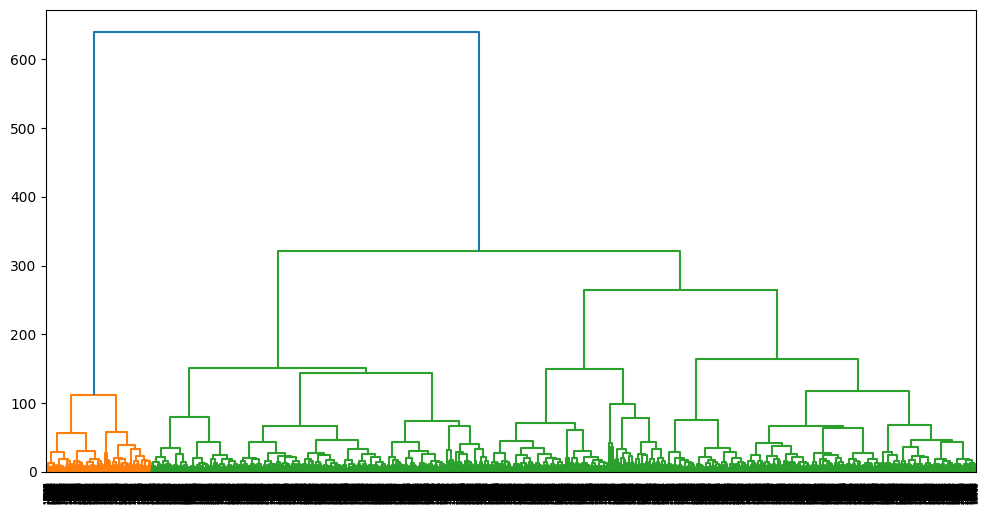

In [26]:
##------------------------------------------------------------------------------
from collections          import Counter
from scipy.cluster        import hierarchy
from sklearn.cluster      import AgglomerativeClustering
plt.figure(figsize = (12, 6))
dg = hierarchy.dendrogram(hierarchy.linkage(X_train_final,
                                            method = 'ward'))